In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prot.viz
import prot.size as size
colors, palette = prot.viz.bokeh_theme()
dataset_colors = {'li_2014':colors['purple'], 'schmidt_2016':colors['light_blue'],
                   'peebo_2015':colors['green'], 'valgepea_2013':colors['red']}
prot.viz.plotting_style()

colors, palette = prot.viz.bokeh_theme()

# color_dict = dict(zip(np.append(dai_Cm_df.condition.unique(), dai_nut_df.condition.unique()), palette))

In [2]:
def compute_elongation_rate(r_aa, R, Kd=5E-3, V=1E-15, t=1, Na=6.022E23, fa=1, rt_max=17.1):
    """
    Computes the physically meaningful root for the elongation rate.
    """
    a = -R * fa * t
    b = r_aa * t + rt_max * R * fa * t + Kd * V * Na
    c = -rt_max * r_aa * t
    numer = -b + np.sqrt(b**2 - 4 * a *c)
    return numer / (2 * a)

def compute_growth_rate(r_t, Naa, R, fa=1):
    """
    Given an elongation rate, compute the growth rate.
    """
    return 3600 * r_t * R * fa * Naa**-1

In [3]:
# Kd=5E-3
rt_max = 17.1
Kd = 15*((rt_max/ 11.5 ) - 1)*1E-1 #mM
Kd = Kd*1E-3 #M

In [4]:
Kd 

0.0007304347826086959

## Wild-type data

Let's try to first recover the expected trend in elongation rates across the wild-type growth conditions. I think it would be nice to try to plot elongation rate versus growth rate, and elongation rate versus ribosome fraction. 

In [5]:
# nutrient limitation; SI data from Dai et al. 2016

conditions = ['RDM + 0.2% glucose+10 mM NH4Cl',
            '0. 2 % glucose+cAA+10 mM NH4Cl',
           ' 10 mM glucose-6-phosphate+10 mM gluconate +10 mM NH4Cl',
            '0.2% glucose+10 mM NH4Cl',
            '0.2% xylose+10 mM NH4Cl',
            '0.2 % glycerol+10 mM NH4Cl',
            '0.2% fructose+10 mM NH4Cl',
            '0.2% sorbitol+10 mM NH4Cl',
            '0.2% galactose+10 mM NH4Cl',
            '60 mM acetate+10 mM NH4Cl',
            '0.2% mannose+10 mM NH4Cl',
            '0.1% mannose+10 mM NH4Cl',
            '20 mM potassium aspartate',
            '0.075% mannose+10 mM NH4Cl',
            '20 mM aspartate+10 mM NH4Cl',
            '0.2% glycerol +10 mM Arginine',
            '20 mM glutamate+10 mM NH4Cl',
            '0.2% glycerol+20 mM Threonine']

erate = [16.7,
         16.3,
         16.1,
         15.9,
         14.9,
         15.0,
         14.7,
         13.7,
         13.1,
         12.6,
         13.0,
         12.4,
         12.0,
         12.1,
         12.3,
         11.6,
         10.7,
         9.4]

RNA_P = [0.476,
        0.364,
        0.306,
        0.294,
        0.233,
        0.227,
        0.217,
        0.193,
        0.184,
        0.172,
        0.172,
        0.152,
        0.152,
        0.147,
        0.137,
        0.130,
        0.118,
        0.097]

r_prot_frac = [np.nan,
            np.nan,
            np.nan,
            11.6,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            7.2,
            np.nan,
            np.nan,
            np.nan,
            5.1,
            np.nan,
            6.1,
            4.7,
            4.4]


gr, fa = np.array([[1.8, 0.958], 
            [1.28, 0.9],
            [1.12, 0.927],
            [0.98, 0.865], 
            [0.75, 0.902], 
            [0.69, 0.849], 
            [0.69, 0.888], 
            [0.55, 0.879],
            [0.5, 0.860], 
            [0.46, 0.879],
            [0.41, 0.756],
            [0.34, 0.751], 
            [0.33, 0.756],
            [0.29, 0.683],
            [0.23, 0.590],
            [0.201, 0.554], 
            [0.13, 0.441],
            [0.035, 0.168]]).T

dai_nut_df = pd.DataFrame({'condition' : conditions,
     'Cm (μM)' : np.zeros(len(gr)),
     'RNA_P_ratio' : RNA_P,
     'growth_rate_hr' : gr,
     'Translational elongation rate (aa/s)' : erate,
     'measured_prot_frac' : r_prot_frac,
     'f_a' : fa,
    'type' : ['nutrient limitation' for i in np.arange(len(gr))]},
        columns = ['condition', 'Cm (μM)', 'RNA_P_ratio', 'growth_rate_hr', 
                   'Translational elongation rate (aa/s)', 'measured_prot_frac', 
                   'f_a', 'type'])


# dai_nut_df['Naa'] = [prot.size.lambda2P(l) * 1E-15 * 6.022E23 / 110 for l in dai_nut_df['growth_rate_hr'].values]

dai_nut_df['Naa'] = prot.size.lambda2P(dai_nut_df['growth_rate_hr']) * 1E-15 * 6.022E23 / 110
dai_nut_df['Naa'] = dai_nut_df['Naa'].values*dai_nut_df['f_a'].values # maybe the way to get the number they used?
dai_nut_df['R'] = (dai_nut_df['RNA_P_ratio']/2.1) * dai_nut_df['Naa'] / 7459.0 
dai_nut_df['R2'] = (dai_nut_df['measured_prot_frac']/100) * dai_nut_df['Naa'] / 7459.0 
dai_nut_df['V'] = prot.size.lambda2size(dai_nut_df['growth_rate_hr'])
dai_nut_df['Phi_R'] = (dai_nut_df['RNA_P_ratio']/2.1)

In [6]:
dai_nut_df.head()

,condition,Cm (μM),RNA_P_ratio,growth_rate_hr,Translational elongation rate (aa/s),measured_prot_frac,f_a,type,Naa,R,R2,V,Phi_R
0,RDM + 0.2% glucose+10 mM NH4Cl,0.0,0.476,1.80,16.7,NaN,0.958,nutrient limitation,3.505599e+09,106529.351729,NaN,3.449298,0.226667
1,0. 2 % glucose+cAA+10 mM NH4Cl,0.0,0.364,1.28,16.3,NaN,0.900,nutrient limitation,2.116852e+09,49191.725509,NaN,2.011341,0.173333
2,10 mM glucose-6-phosphate+10 mM gluconate +10...,0.0,0.306,1.12,16.1,NaN,0.927,nutrient limitation,1.903160e+09,37178.933217,NaN,1.703767,0.145714
3,0.2% glucose+10 mM NH4Cl,0.0,0.294,0.98,15.9,11.6,0.865,nutrient limitation,1.576870e+09,29596.703738,24522.983097,1.473480,0.140000
4,0.2% xylose+10 mM NH4Cl,0.0,0.233,0.75,14.9,NaN,0.902,nutrient limitation,1.353128e+09,20127.737984,NaN,1.160743,0.110952


In [14]:
dai_nut_df.to_csv('../../data/dai2016_raw_data/dai2016_nutrient_data_summary.csv')

In [8]:
dai_Cm_df = pd.DataFrame({'condition' : ['20 mM potassium aspartate' for i in np.arange(3)],
          'Cm (μM)' : [0, 2, 4],
          'growth_rate_hr' : [0.33, 0.24, 0.17],
          'Translational elongation rate (aa/s)' : [12.0 , 15.3, 15.8],
     'f_a' : [0.756, 0.282, 0.158],
     'RNA_P_ratio' : [0.152, 0.231, 0.292],
    'type' : ['antibiotic' for i in np.arange(3)]},
            columns = ['condition', 'Cm (μM)','growth_rate_hr',
                    'Translational elongation rate (aa/s)','f_a',
                       'RNA_P_ratio' , 'type' ])
    
dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['RDM + 0.2% glucose+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 4, 8],
      'growth_rate_hr' : [1.8, 1.08, 0.57],
      'Translational elongation rate (aa/s)' : [16.7 , 16.8, 17.3],
 'f_a' : [0.958, 0.505, 0.243],
 'RNA_P_ratio' : [0.476, 0.551, 0.621],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )

dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['60 mM acetate+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 3, 6],
      'growth_rate_hr' : [0.46, 0.25, 0.18],
      'Translational elongation rate (aa/s)' : [12.6  , 14.5, 15.6],
 'f_a' : [0.879, 0.303, 0.170],
 'RNA_P_ratio' : [0.172, 0.246, 0.304],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )
    
dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['0.2% fructose+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 4, 8],
      'growth_rate_hr' : [0.69, 0.35, 0.21],
      'Translational elongation rate (aa/s)' : [14.7 , 15.9 , 16.3],
 'f_a' : [0.888, 0.290, 0.124],
 'RNA_P_ratio' : [0.217, 0.323, 0.457],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )

dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['0.2% glucose+10 mM NH4Cl' for i in np.arange(6)],
      'Cm (μM)' : [0, 2, 4, 6, 8, 9],
      'growth_rate_hr' : [0.98, 0.71, 0.53, 0.41, 0.33, 0.26],
      'Translational elongation rate (aa/s)' : [15.9, 16.0, 16.1, 16.2, 16.5, 16.6],
 'f_a' : [0.865, 0.519, 0.318, 0.222, 0.164, 0.123],
 'RNA_P_ratio' : [0.294, 0.358, 0.440, 0.487, 0.511, 0.569],
'type' : ['antibiotic' for i in np.arange(6)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )


dai_Cm_df['Naa'] = [prot.size.lambda2P(l) * 1E-15 * 6.022E23 / 110 for l in dai_Cm_df['growth_rate_hr'].values]
dai_Cm_df['R'] = (dai_Cm_df['RNA_P_ratio']/2.1) * dai_Cm_df['Naa'] / 7459.0 

dai_Cm_df['Phi_R'] = (dai_Cm_df['RNA_P_ratio']/2.1) 

In [9]:
dai_Cm_df.head()

,condition,Cm (μM),growth_rate_hr,Translational elongation rate (aa/s),f_a,RNA_P_ratio,type,Naa,R,Phi_R
0,20 mM potassium aspartate,0,0.33,12.0,0.756,0.152,antibiotic,[1020865377.6761408],[9906.315630639458],0.072381
1,20 mM potassium aspartate,2,0.24,15.3,0.282,0.231,antibiotic,[940495158.8776363],[13869.75029850382],0.110000
2,20 mM potassium aspartate,4,0.17,15.8,0.158,0.292,antibiotic,[882284271.6874208],[16447.181566067637],0.139048
0,RDM + 0.2% glucose+10 mM NH4Cl,0,1.80,16.7,0.958,0.476,antibiotic,[3659289118.941856],[111199.74084463788],0.226667
1,RDM + 0.2% glucose+10 mM NH4Cl,4,1.08,16.8,0.505,0.551,antibiotic,[1984459337.23972],[69806.18459126308],0.262381


In [10]:
dai_Cm_df.to_csv('../../data/dai2016_raw_data/dai2016_chlor_data_summary.csv')

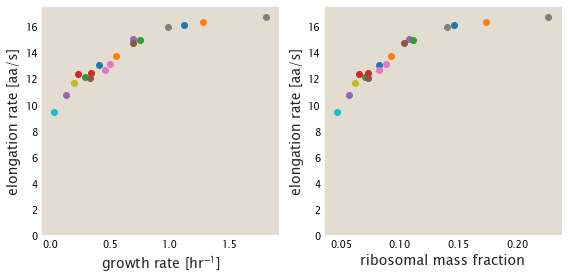

In [11]:

color_dict = dict(zip(np.append(dai_Cm_df.condition.unique(), dai_nut_df.condition.unique()), palette))

fig, ax = plt.subplots(1, 2, figsize = (8,4))
    
for cond, d in dai_nut_df.groupby('condition'):
    ax[0].scatter(d['growth_rate_hr'], d['Translational elongation rate (aa/s)'], zorder = 10)
    ax[1].scatter(d['RNA_P_ratio']/2.1, d['Translational elongation rate (aa/s)'], zorder = 10)
    #,
#               color =  color_dict[cond])
    
ax[0].set_ylim(0,17.5)
ax[0].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[0].set_ylabel('elongation rate [aa/s]', fontsize = 14)

ax[1].set_ylim(0,17.5)
ax[1].set_xlabel('ribosomal mass fraction', fontsize = 14)
ax[1].set_ylabel('elongation rate [aa/s]', fontsize = 14)
plt.tight_layout()

In [5]:
# dai_nut_df.head()

Lets try to figure out reasonable values for the r_aa parameter. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(1000, 100000000.0)

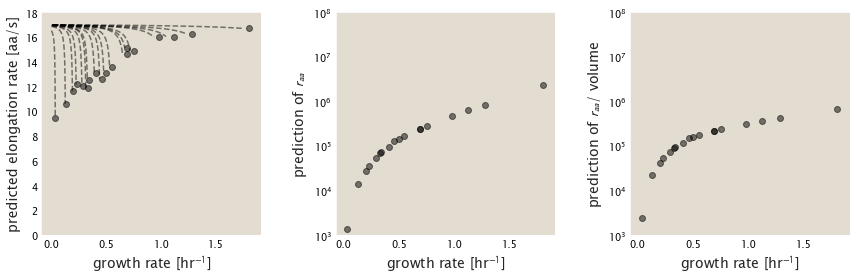

In [12]:
df_raa_est = pd.DataFrame()

fig, ax = plt.subplots(1, 3, figsize = (12,4))

for gr, d in dai_nut_df.groupby(['growth_rate_hr', 'condition']):
    r_aa = np.logspace(-1,10, 1000)
    rt = compute_elongation_rate(r_aa, d['R'].values[0], Kd=1E-2, V=d['V'].values[0]*1E-15, #Kd=1E-5
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values[0]), #t=d['growth_rate_hr'].values[0], 
                        Na=6.022E23, fa=d['f_a'].values[0], rt_max=17.1)
    
    rt_compare = list(np.abs(rt - d['Translational elongation rate (aa/s)'].values[0]))

    minpos = rt_compare.index(min(rt_compare))
    
    
    df_raa_est_list = {'condition' :  gr[1],
                      'growth_rate_hr' : gr[0],
                      'raa_bestfit' : r_aa[minpos],
                      'rt' : d['Translational elongation rate (aa/s)'].values[0],
                      'f_a' : d['f_a'].values[0],
                      'rt_fit' : rt[minpos],
                      'V' : d['V'].values[0],
                      'R' : d['R'].values[0], 
                      'Naa' : d['Naa'].values[0], 
                      'Phi_R' : d['Phi_R'].values[0]}
    df_raa_est = df_raa_est.append(df_raa_est_list,
                                  ignore_index = True)
    
    ax[0].scatter(gr[0], rt[minpos], zorder=10,
               color = 'k', alpha = 0.5)
    
    # also plot effect as fcn of f_a
    f_a = np.linspace(0,d['f_a'].values[0],100)
    rt_fa = compute_elongation_rate(r_aa[minpos], d['R'].values[0], Kd=1E-2, V=d['V'].values[0]*1E-15, #Kd=1E-5
                             t=60*60*(np.log(2)/d['growth_rate_hr'].values[0]), #t=d['growth_rate_hr'].values[0], 
                    Na=6.022E23, fa=f_a, rt_max=17.1)
    gr_fa = compute_growth_rate(rt_fa, d['Naa'].values[0], d['R'].values[0], f_a)
        
    ax[0].plot(gr_fa, rt_fa, ls ='--', color = 'k', alpha = 0.5)
    
    ax[1].scatter(gr[0], r_aa[minpos], zorder=10,
               color = 'k', alpha = 0.5)
    
    ax[2].scatter(gr[0], r_aa[minpos]/d['V'], zorder=10,
               color = 'k', alpha = 0.5)
    
    aa_conc  = 60*60*(np.log(2)/d['growth_rate_hr'].values[0])*(r_aa[minpos] - rt[minpos]*d['R'].values[0]*d['f_a'].values[0])/(6.022E23*d['V'].values[0]*1E-15)
#     print(aa_conc, r_aa[minpos])
ax[0].set_ylim(0,18)
ax[0].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[0].set_ylabel('predicted elongation rate [aa/s]', fontsize = 14)

# ax[1].set_ylim(0,18)
ax[1].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[1].set_ylabel('prediction of $r_{aa}$', fontsize = 14)

# ax[1].set_ylim(0,18)
ax[2].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[2].set_ylabel('prediction of $r_{aa}$/ volume', fontsize = 14)


plt.tight_layout()
ax[1].set_yscale('log')
ax[1].set_ylim(1000,1E8)

plt.tight_layout()
ax[2].set_yscale('log')
ax[2].set_ylim(1000,1E8)


## Cm dosages

Now  lets use the estimated r_aa values to make predictions about the change in elongation rate as chlor is added to the media.

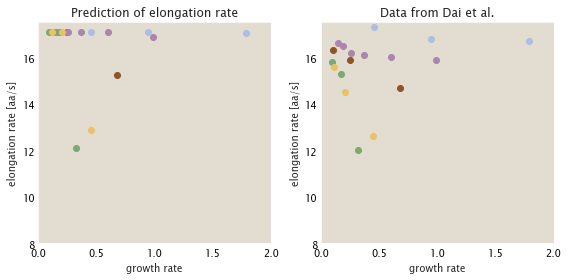

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

for cond, d in dai_Cm_df.groupby('condition'):
    df_raa_est_ = df_raa_est[df_raa_est.condition == cond]
    
    #  just try to make a small  adjustment to r_aa due to 
    #  increase in ribosome fraction (doesn't appear to affect much)
    sec_M =  0.5 - df_raa_est_['Phi_R'].values
    sec_M_new = 0.5 - d['Phi_R'].values
    M_reduced = sec_M_new/sec_M
    
    rt = compute_elongation_rate(df_raa_est_.raa_bestfit.values[0]*M_reduced, 
                                 df_raa_est_.R.values[0], 
                                 Kd=1E-3,#Kd, 
                                 V=df_raa_est_.V.values[0]*1E-15, 
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values), 
                                 Na=6.022E23, fa=d['f_a'].values, rt_max=17.1) 
    
    gr = compute_growth_rate(rt, df_raa_est_.Naa.values[0], df_raa_est_.R.values[0], fa=d['f_a'].values)

    ax[0].scatter(gr, rt, zorder=10,
               color =  color_dict[cond])
    ax[0].set_title('Prediction of elongation rate')
#               color = 'k', alpha = 0.5)
    ax[1].scatter(gr, d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    ax[1].set_title('Data from Dai et al.')
for  _ax in ax:  
    _ax.set_ylim(8,17.5)
    _ax.set_xlim(0,2)
    _ax.set_xlabel('growth rate')
    _ax.set_ylabel('elongation rate [aa/s]')
    
plt.tight_layout()

consider larger rt_max

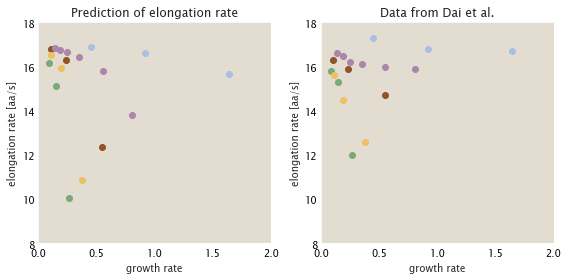

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

for cond, d in dai_Cm_df.groupby('condition'):
    df_raa_est_ = df_raa_est[df_raa_est.condition == cond]
    
    #  just try to make a small  adjustment to r_aa due to 
    #  increase in ribosome fraction (doesn't appear to affect much)
    sec_M =  0.5 - df_raa_est_['Phi_R'].values
    sec_M_new = 0.5 - d['Phi_R'].values
    M_reduced = sec_M_new/sec_M
    
    rt = compute_elongation_rate(df_raa_est_.raa_bestfit.values[0]*M_reduced, 
                                 df_raa_est_.R.values[0], 
                                 Kd=1E-2/d['Phi_R'],#Kd, 
                                 V=df_raa_est_.V.values[0]*1E-15, 
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values), 
                                 Na=6.022E23, fa=d['f_a'].values, rt_max=17.1) 

    gr = compute_growth_rate(rt, df_raa_est_.Naa.values[0], df_raa_est_.R.values[0], fa=d['f_a'].values)
#     print(rt, gr)
    ax[0].scatter(gr, rt, zorder=10,
               color =  color_dict[cond])
    ax[0].set_title('Prediction of elongation rate')
#               color = 'k', alpha = 0.5)
    ax[1].scatter(gr, d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    ax[1].set_title('Data from Dai et al.')
for  _ax in ax:  
    _ax.set_ylim(8,18)
    _ax.set_xlim(0,2)
    _ax.set_xlabel('growth rate')
    _ax.set_ylabel('elongation rate [aa/s]')
    
plt.tight_layout()

Lets try with Dai et al. equation for r_t

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


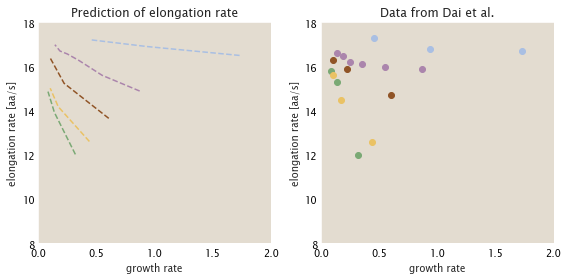

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

for cond, d in dai_Cm_df.groupby('condition'):
    df_raa_est_ = df_raa_est[df_raa_est.condition == cond]
    
    #  just try to make a small  adjustment to r_aa due to 
    #  increase in ribosome fraction (doesn't appear to affect much)
    sec_M =  0.5 - df_raa_est_['Phi_R'].values
    sec_M_new = 0.5 - d['Phi_R'].values
    M_reduced = sec_M_new/sec_M
    
#     rt = compute_elongation_rate(df_raa_est_.raa_bestfit.values[0]*M_reduced, 
#                                  df_raa_est_.R.values[0], 
#                                  Kd=1E-2/d['Phi_R'],#Kd, 
#                                  V=df_raa_est_.V.values[0]*1E-15, 
#                                  t=60*60*(np.log(2)/d['growth_rate_hr'].values), 
#                                  Na=6.022E23, fa=d['f_a'].values, rt_max=17.1) 
    rt = 1/((1/20) + 1/(6.4*31*d['RNA_P_ratio']))
#     print(rt)
#     rt = 22/(1 + 0.11/d['RNA_P_ratio'])
#     print(d['RNA_P_ratio'])
#     print(rt)
#     break
    gr = compute_growth_rate(rt, df_raa_est_.Naa.values[0], df_raa_est_.R.values[0], fa=d['f_a'].values)
#     print(rt, gr)
#     ax[0].scatter(gr, rt, zorder=10,
#                color =  color_dict[cond])
    ax[0].plot(gr, rt, zorder=10, ls = '--',
               color =  color_dict[cond])
    
    ax[0].set_title('Prediction of elongation rate')
#               color = 'k', alpha = 0.5)
    ax[1].scatter(gr, d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    ax[1].set_title('Data from Dai et al.')
for  _ax in ax:  
    _ax.set_ylim(8,18)
    _ax.set_xlim(0,2)
    _ax.set_xlabel('growth rate')
    _ax.set_ylabel('elongation rate [aa/s]')
    
plt.tight_layout()

(0, 20)

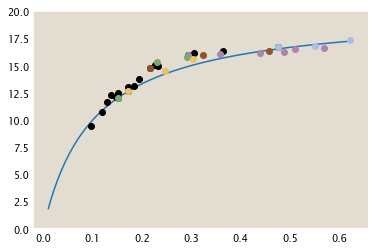

In [60]:
rp = np.linspace(0.01,0.621, 100)
plt.plot(rp, 1/((1/20) + 1/(6.4*31*rp)))

for cond, d in dai_nut_df.groupby('condition'):
    
    plt.scatter(d['RNA_P_ratio'], d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  'k')
    
for cond, d in dai_Cm_df.groupby('condition'):
    plt.scatter(d['RNA_P_ratio'], d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    
plt.ylim(0,20)

In [51]:
1/((1/20) + 1/(6.4*31*rp))

array([ 1.81987992,  2.80010309,  3.68951134,  4.50016654,  5.24208507,
        5.9236538 ,  6.55194847,  7.13298033,  7.67188901,  8.17309498,
        8.64042112,  9.07719035,  9.48630482,  9.87031044, 10.23144992,
       10.5717066 , 10.8928409 , 11.19642078, 11.48384732, 11.75637638,
       12.01513692, 12.26114663, 12.49532534, 12.71850646, 12.93144692,
       13.13483575, 13.32930153, 13.51541886, 13.69371404, 13.86467005,
       14.02873091, 14.18630551, 14.33777106, 14.48347607, 14.62374304,
       14.75887082, 14.88913678, 15.01479867, 15.13609633, 15.25325324,
       15.36647787, 15.47596493, 15.58189648, 15.68444295, 15.78376404,
       15.88000956, 15.97332021, 16.06382819, 16.15165792, 16.23692655,
       16.31974447, 16.40021586, 16.47843904, 16.55450694, 16.62850741,
       16.70052362, 16.77063432, 16.83891415, 16.9054339 , 16.97026076,
       17.03345854, 17.0950879 , 17.15520649, 17.21386921, 17.27112829,
       17.32703353, 17.38163238, 17.4349701 , 17.48708989, 17.53

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


0.2% fructose+10 mM NH4Cl
0.2% glucose+10 mM NH4Cl
20 mM potassium aspartate
60 mM acetate+10 mM NH4Cl
RDM + 0.2% glucose+10 mM NH4Cl


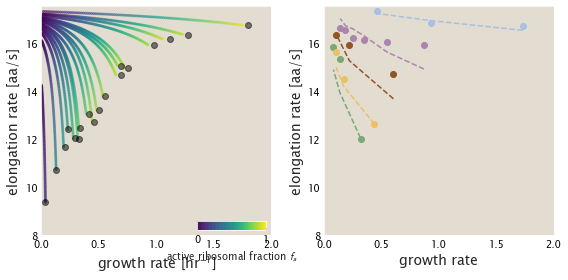

In [85]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cm = plt.cm.get_cmap('viridis')

df_raa_est = pd.DataFrame()

fig, ax = plt.subplots(1, 2, figsize = (8,4))

for gr, d in dai_nut_df.groupby(['growth_rate_hr', 'condition']):
    r_aa = np.logspace(-1,10, 1000)
    rt = compute_elongation_rate(r_aa, d['R'].values[0], Kd=1E-1, V=d['V'].values[0]*1E-15, #Kd=1E-5
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values[0]), #t=d['growth_rate_hr'].values[0], 
                        Na=6.022E23, fa=d['f_a'].values[0], rt_max=18)
    
    rt_compare = list(np.abs(rt - d['Translational elongation rate (aa/s)'].values[0]))

    minpos = rt_compare.index(min(rt_compare))
    
    
    df_raa_est_list = {'condition' :  gr[1],
                      'growth_rate_hr' : gr[0],
                      'raa_bestfit' : r_aa[minpos],
                      'rt' : d['Translational elongation rate (aa/s)'].values[0],
                      'f_a' : d['f_a'].values[0],
                      'rt_fit' : rt[minpos],
                      'V' : d['V'].values[0],
                      'R' : d['R'].values[0], 
                      'Naa' : d['Naa'].values[0], 
                      'Phi_R' : d['Phi_R'].values[0]}
    df_raa_est = df_raa_est.append(df_raa_est_list,
                                  ignore_index = True)
    
    ax[0].scatter(gr[0], rt[minpos], zorder=10,
               color = 'k', alpha = 0.5)
    
    # also plot effect as fcn of f_a
    f_a = np.linspace(0,d['f_a'].values[0],100)
    rt_fa = compute_elongation_rate(r_aa[minpos], d['R'].values[0], Kd=1E-1, V=d['V'].values[0]*1E-15, #Kd=1E-5
                             t=60*60*(np.log(2)/d['growth_rate_hr'].values[0]), #t=d['growth_rate_hr'].values[0], 
                    Na=6.022E23, fa=f_a, rt_max=18)
    gr_fa = compute_growth_rate(rt_fa, d['Naa'].values[0], d['R'].values[0], f_a)
        
    sc = ax[0].scatter(gr_fa, rt_fa, c=f_a, cmap=cm, vmin = 0,  vmax =  1, s = 4, alpha = 0.5)

ax[0].set_ylim(8,17.5)
ax[0].set_xlim(0,2)
ax[0].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[0].set_ylabel('elongation rate [aa/s]', fontsize = 14)
cbaxes = inset_axes(ax[0], width="30%", height="4%", loc=4) 
plt.colorbar(sc, cax=cbaxes, ticks=[0.,1], orientation='horizontal')

cbaxes.set_xlabel('active ribosomal fraction $f_a$')



for cond, d in dai_Cm_df.groupby('condition'):
    print(cond)
    df_raa_est_ = df_raa_est[df_raa_est.condition == cond]

#     rt = 1/((1/20) + 1/(6.4*31*d['RNA_P_ratio']))
    rt = 1/((1/20) + 1/(6.4*31*d['RNA_P_ratio']))
    gr = compute_growth_rate(rt, df_raa_est_.Naa.values[0], df_raa_est_.R.values[0], fa=d['f_a'].values)

    ax[1].plot(gr, rt, zorder=10, ls = '--',
               color =  color_dict[cond])

    ax[1].scatter(gr, d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    

ax[1].set_ylim(8,17.5)
ax[1].set_xlim(0,2)
ax[1].set_xlabel('growth rate', fontsize = 14)
ax[1].set_ylabel('elongation rate [aa/s]', fontsize = 14)
    
plt.tight_layout()

plt.savefig('../../figures/SI_figX_Cm_data.pdf')